## MLP Kaggle Competition

### Steps:
1. **Importing required libraries**
2. **Loading data**
3. **Exploratory Data Analysis (EDA)**
4. **Data Preprocessing**
5. **Feature Selection**
6. **Model**
7. **Submission**


## **1. Importing required libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
import regex as re
import warnings
from sklearn.exceptions import ConvergenceWarning

import datetime as dt
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.preprocessing import ( FunctionTransformer,
                                    PolynomialFeatures,
                                    LabelEncoder,
                                    OrdinalEncoder,
                                    OneHotEncoder,
                                    MinMaxScaler,
                                   MaxAbsScaler,
                                   MaxAbsScaler,
                                    StandardScaler)
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from scipy.stats import uniform, randint 

## 2. **Loading Data** 
Reading bank telemarketing, test and train data

In [3]:
samp_submission = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
test_data =  pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

## 3. **Exploratory Data Analysis (EDA)¶**
* Data Analysis
* Feature Details
* Handling Outliers
* Checking correlation
* Checking Mutual Information

In [4]:
pd.set_option("display.max_columns", 100)

In [5]:
print("Shape of samp_submission : ", samp_submission.shape)
print("Shape of train : ", train_data.shape)
print("Shape of test : ", test_data.shape)

Shape of samp_submission :  (10000, 2)
Shape of train :  (39211, 16)
Shape of test :  (10000, 15)


In [6]:
train_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
train_data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
train_data["last contact date"]= pd.to_datetime(train_data["last contact date" ])
test_data["last contact date"]= pd.to_datetime(test_data["last contact date" ])

In [10]:
samp_submission.head(10)

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes
5,5,no
6,6,no
7,7,yes
8,8,no
9,9,no


#### Feature Details

#### Columns Description
1. **last contact date**: last contact date
2. **age**: age (numeric)
3. **job**: type of job
4. **marital**: marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
5. **education**: education level (categorical: "unknown", "secondary", "primary", "tertiary")
6. **default**: has credit in default? (binary: "yes", "no")
7. **balance**: average yearly balance, in euros (numeric)
8. **housing**: has housing loan? (binary: "yes", "no")
9. **loan**: has personal loan? (binary: "yes", "no")
10. **contact**: contact communication type (categorical: "unknown", "telephone", "cellular")
11. **duration**: last contact duration, in seconds (numeric)
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")


**last contact date**: last contact date

In [11]:
train_data["last contact date"].unique()

<DatetimeArray>
['2009-04-17 00:00:00', '2009-10-11 00:00:00', '2010-11-20 00:00:00',
 '2009-09-01 00:00:00', '2008-01-29 00:00:00', '2009-05-07 00:00:00',
 '2009-05-15 00:00:00', '2010-05-08 00:00:00', '2008-12-13 00:00:00',
 '2010-05-21 00:00:00',
 ...
 '2009-05-17 00:00:00', '2008-02-13 00:00:00', '2009-07-19 00:00:00',
 '2008-07-06 00:00:00', '2009-05-10 00:00:00', '2010-11-24 00:00:00',
 '2008-12-31 00:00:00', '2009-07-05 00:00:00', '2008-02-25 00:00:00',
 '2010-04-12 00:00:00']
Length: 1013, dtype: datetime64[ns]

Date Length are 1013 that mean this can be depend on target that also mean it's not a index 

**age**: age (numeric)

In [12]:
train_data["age"].unique()

array([26, 52, 44, 33, 31, 25, 46, 37, 38, 32, 28, 34, 86, 42, 58, 39, 35,
       47, 45, 48, 30, 50, 56, 54, 40, 53, 41, 51, 27, 29, 57, 63, 36, 43,
       19, 55, 49, 23, 83, 60, 22, 80, 76, 59, 24, 93, 71, 89, 64, 68, 85,
       79, 62, 69, 20, 90, 66, 87, 72, 88, 67, 70, 77, 91, 78, 61, 65, 73,
       74, 84, 82, 92, 81, 18, 21, 75, 94, 95])

In [13]:
train_data["job"].unique()

array(['blue-collar', 'technician', 'admin.', 'entrepreneur',
       'unemployed', 'management', 'services', 'student', 'self-employed',
       'retired', 'housemaid', nan], dtype=object)

In [14]:
train_data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
train_data["education"].unique()

array(['secondary', 'tertiary', 'primary', nan], dtype=object)

In [16]:
train_data["default"].unique()

array(['no', 'yes'], dtype=object)

In [17]:
train_data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
train_data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [19]:
train_data["contact"].unique()

array(['cellular', 'telephone', nan], dtype=object)

In [20]:
train_data["duration"].unique()

array([ 357,  160,  326, ..., 3506, 4144, 1631])

In [21]:
train_data["campaign"].unique()

array([ 2,  1,  3,  4,  6, 45,  5, 44, 12, 61, 58,  7,  8, 20, 43, 17, 13,
       15, 48, 34, 11, 54, 22, 26, 29, 21, 10, 49,  9, 52, 53, 57, 16, 50,
       46, 47, 23, 37, 18, 38, 32, 36, 39, 56, 14, 30, 41, 63, 51, 28, 25,
       62, 55, 42, 35, 31, 59, 19, 40, 33, 24, 27, 60])

In [22]:
train_data["pdays"].unique()

array([331,  -1, 852, 661, 152, 599, 365, 367, 238, 129, 287, 174, 120,
       368, 371, 187, 610, 364, 633,  80, 125, 356, 248, 186, 278, 154,
        90,  98, 574, 352, 561, 260, 801,  78, 596, 343, 671, 175, 159,
        12, 111,  31, 342, 357,  74, 100, 289,  84, 109, 245, 369,  83,
       536, 216,  89,  97, 252, 143, 378, 336, 172, 160, 191,  91, 848,
       258, 317,  94, 196, 362, 188, 272, 138, 298, 116, 101, 591, 360,
       234, 505, 631,  82,   8, 300, 472, 173, 530, 103, 236, 316, 370,
       611, 271, 305,  79, 474, 405, 293, 442, 178, 232, 299, 213, 184,
       237,  93,  37, 255, 353, 259, 181, 315, 147, 349, 335, 165, 295,
       203, 290,   6, 767, 302, 169, 320, 148,  19, 435, 328, 645, 526,
       150, 318, 347,  29,  96, 254,  35, 136, 350, 759, 358, 670, 348,
       224, 114, 102, 407, 326, 330, 665, 760, 445, 373, 265, 190, 285,
       246, 644, 337, 161, 264, 562, 189, 363, 630, 652,  44, 478, 322,
       176, 783, 597, 344, 339, 110, 334, 167, 204, 166, 816, 48

In [23]:
train_data["previous"].unique()

array([  1,   0,   4, 143, 234,   3,  18,   2, 225, 219,   6,  12,  16,
       248, 217, 116,   8, 119,  37,  69, 113,  14, 265, 175, 103,  28,
        86,   5, 196, 156, 207, 218, 148, 213,  87, 241,  60, 235, 172,
       255, 266,  17, 135,  99,  20,   9, 270, 229, 188, 105, 141, 153,
       131, 182, 223, 177,  70,  75,   7,  91, 236,  85, 100, 160,  30,
        63, 178, 150,  72, 233,  40, 145, 272,  24, 249,  97, 193, 140,
       222, 128,  90,  10, 155, 122, 134, 252, 117, 173, 203, 226,  23,
       194, 208,  77, 274,  38, 273, 244,  15, 176,  96,  31, 133, 259,
       191, 101, 197, 192, 152, 216, 204, 206,  71, 180, 250, 268, 144,
        81, 110, 136,  43,  19,  74, 187, 205,  66, 269,  36, 166,  29,
        53, 200, 261,  13,  61, 186,  62, 104, 138, 123,  78, 189, 147,
       185, 179, 129, 190, 111, 139, 211, 245,  22,  51, 171,  26, 254,
        84, 174,  46,  48,  58,  68, 228,  11,  80,  55, 107, 232, 202,
       132, 264,  56, 260, 181,  32, 163,  94,  83,  54, 240, 15

In [24]:
train_data["poutcome"].unique()

array(['other', nan, 'failure', 'success'], dtype=object)

In [25]:
train_data.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [26]:
test_data.isna().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

## **4. Data Preprocessing**

In [27]:
train = train_data.drop(['default'], axis=1)
test = test_data.drop(['default'], axis=1)
train["month"] = train_data["last contact date"].dt.month
train["year"] = train_data["last contact date"].dt.year
test["month"] = test["last contact date"].dt.month
test["year"] = test["last contact date"].dt.year
train.head()

,last contact date,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,month,year
0,2009-04-17,26,blue-collar,married,secondary,647,yes,no,cellular,357,2,331,1,other,no,4,2009
1,2009-10-11,52,technician,married,secondary,553,yes,no,telephone,160,1,-1,0,NaN,no,10,2009
2,2010-11-20,44,blue-collar,married,secondary,1397,no,no,cellular,326,1,-1,0,NaN,no,11,2010
3,2009-09-01,33,admin.,married,secondary,394,yes,no,telephone,104,3,-1,0,NaN,no,9,2009
4,2008-01-29,31,entrepreneur,single,tertiary,137,no,no,cellular,445,2,-1,0,NaN,no,1,2008


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   balance            39211 non-null  int64         
 6   housing            39211 non-null  object        
 7   loan               39211 non-null  object        
 8   contact            28875 non-null  object        
 9   duration           39211 non-null  int64         
 10  campaign           39211 non-null  int64         
 11  pdays              39211 non-null  int64         
 12  previous           39211 non-null  int64         
 13  poutcome           9760 non-null   object        
 14  target

In [29]:
train = train.replace({'no': 0, 'yes': 1}).infer_objects(copy=False)
test = test.replace({'no': 0, 'yes': 1}).infer_objects(copy=False)
train.head()

/tmp/ipykernel_17/1016190148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({'no': 0, 'yes': 1}).infer_objects(copy=False)
/tmp/ipykernel_17/1016190148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace({'no': 0, 'yes': 1}).infer_objects(copy=False)


,last contact date,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,month,year
0,2009-04-17,26,blue-collar,married,secondary,647,1,0,cellular,357,2,331,1,other,0,4,2009
1,2009-10-11,52,technician,married,secondary,553,1,0,telephone,160,1,-1,0,NaN,0,10,2009
2,2010-11-20,44,blue-collar,married,secondary,1397,0,0,cellular,326,1,-1,0,NaN,0,11,2010
3,2009-09-01,33,admin.,married,secondary,394,1,0,telephone,104,3,-1,0,NaN,0,9,2009
4,2008-01-29,31,entrepreneur,single,tertiary,137,0,0,cellular,445,2,-1,0,NaN,0,1,2008


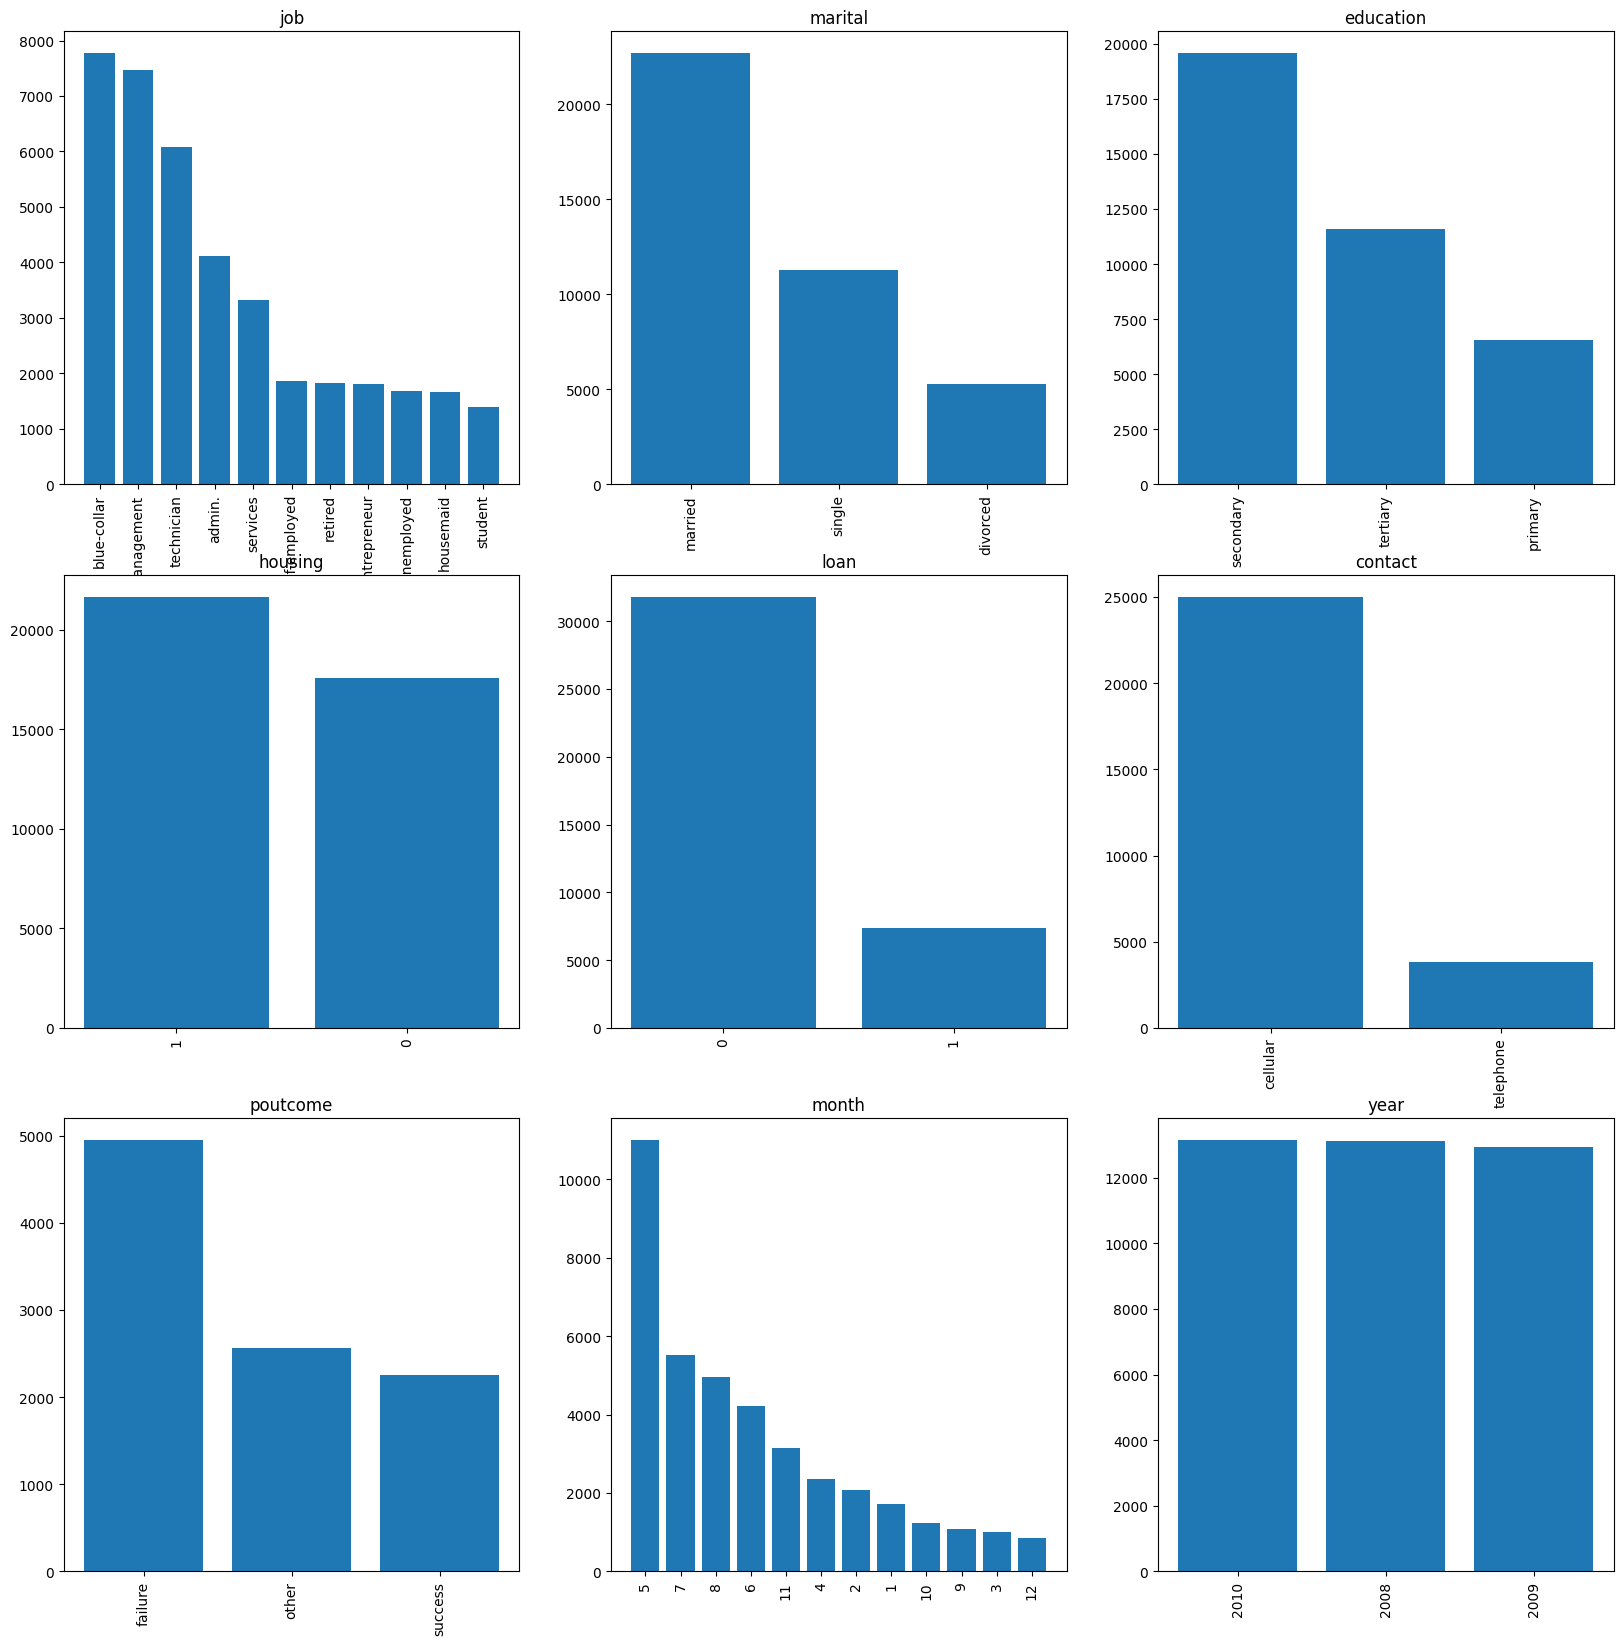

In [30]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome','month','year']

fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for column in categorical_columns:
    trace_x = counter // 3
    trace_y = counter % 3

    counts = train[column].value_counts()
    
    x_pos = np.arange(0, len(counts))
    
    ax[trace_x, trace_y].bar(x_pos, counts.values, tick_label = counts.index)
    ax[trace_x, trace_y].set_title(column)
    
    for tick in ax[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

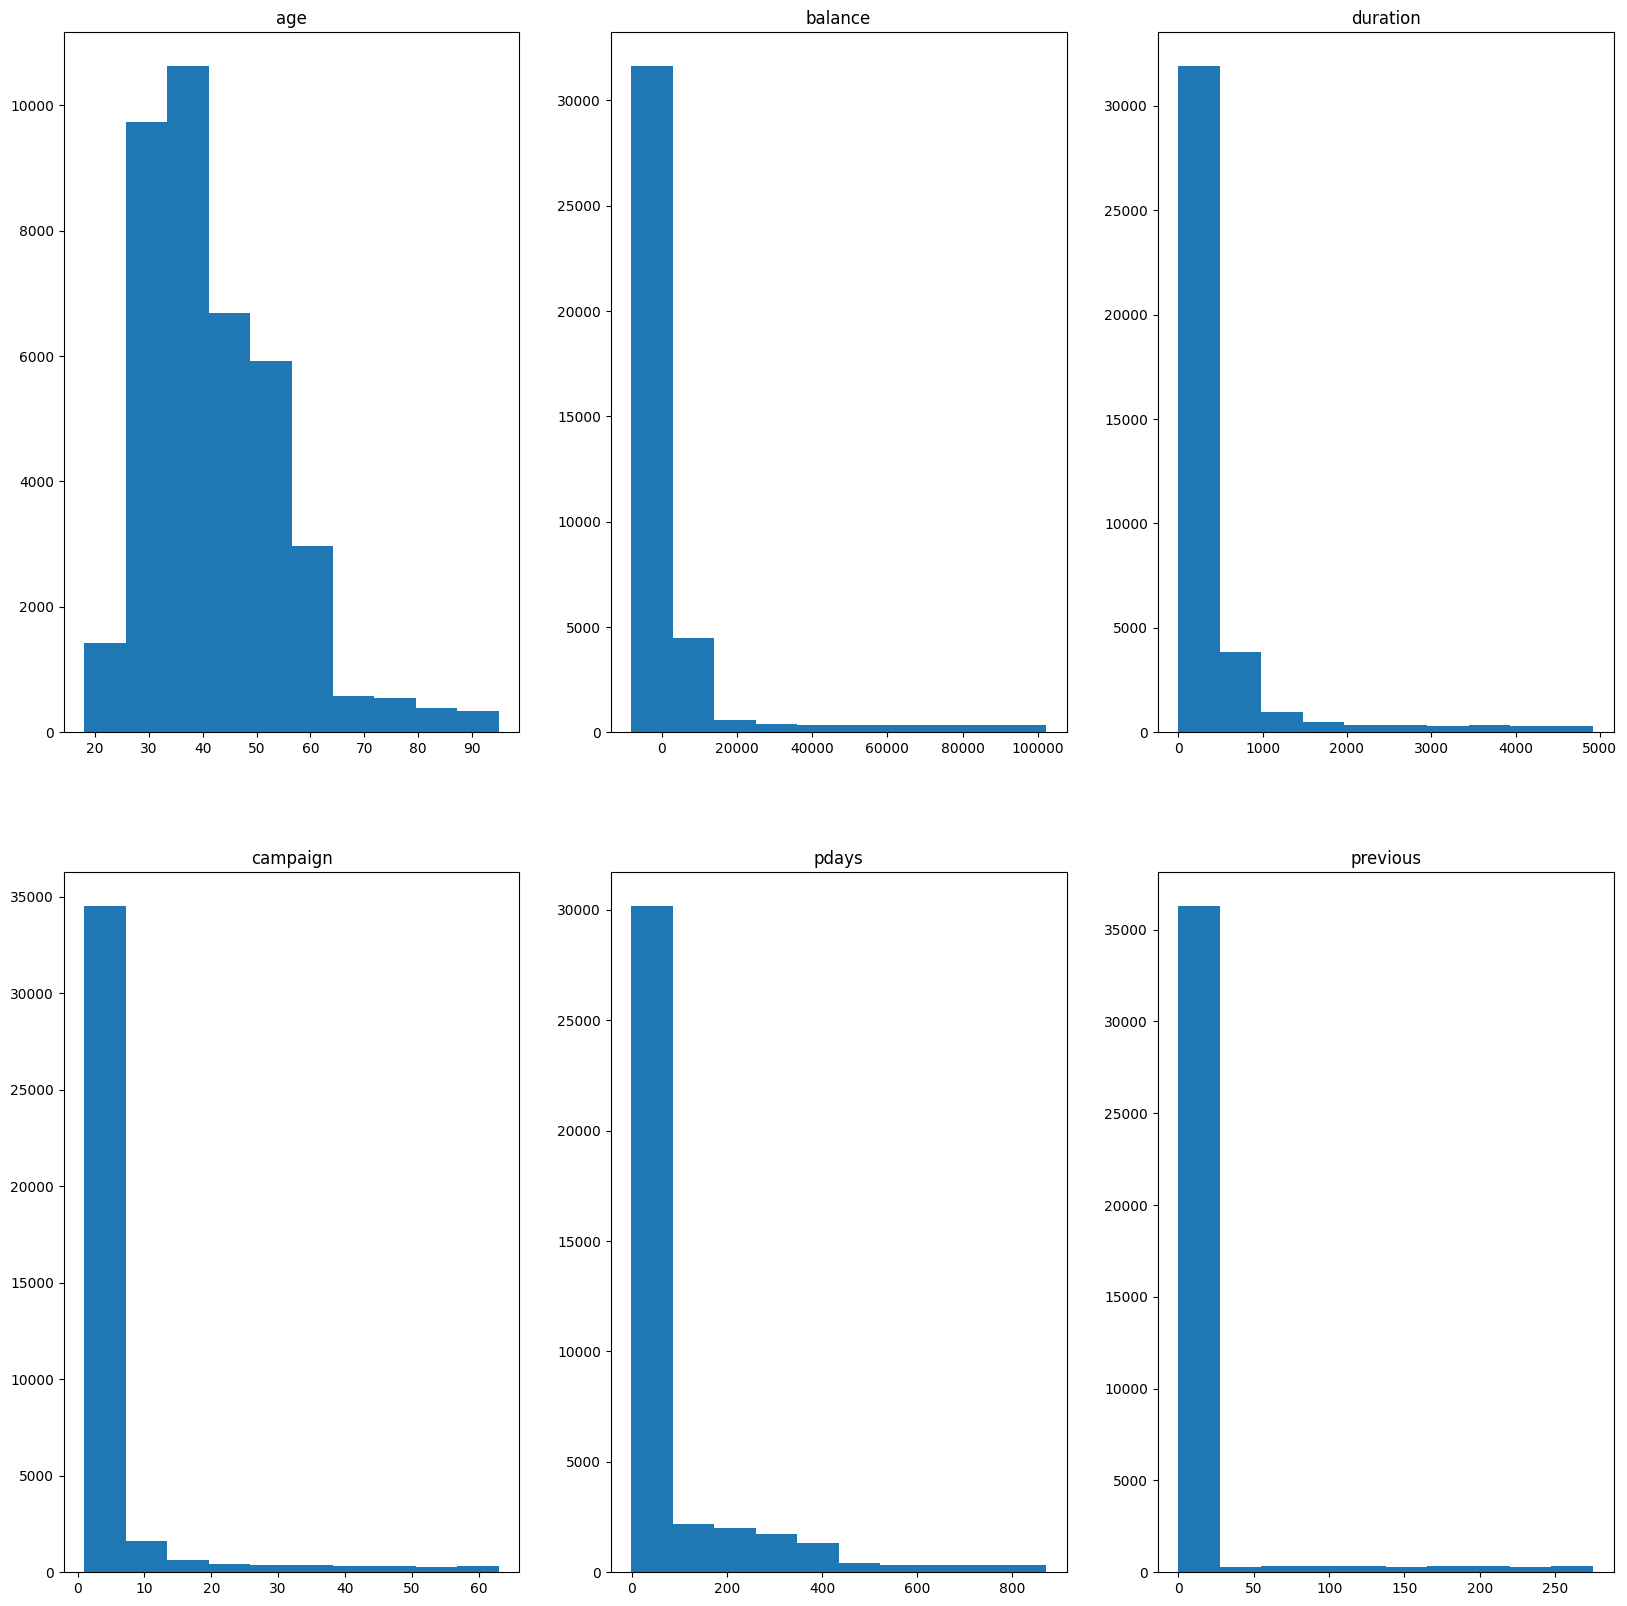

In [31]:
numerical_columns = ['age','balance', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for column in numerical_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    ax[trace_x, trace_y].hist(train[column])
    
    ax[trace_x, trace_y].set_title(column)
    
    counter += 1

plt.show()



Null value count per column:
last contact date        0
age                      0
job                    229
marital                  0
education             1467
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
month                    0
year                     0
dtype: int64


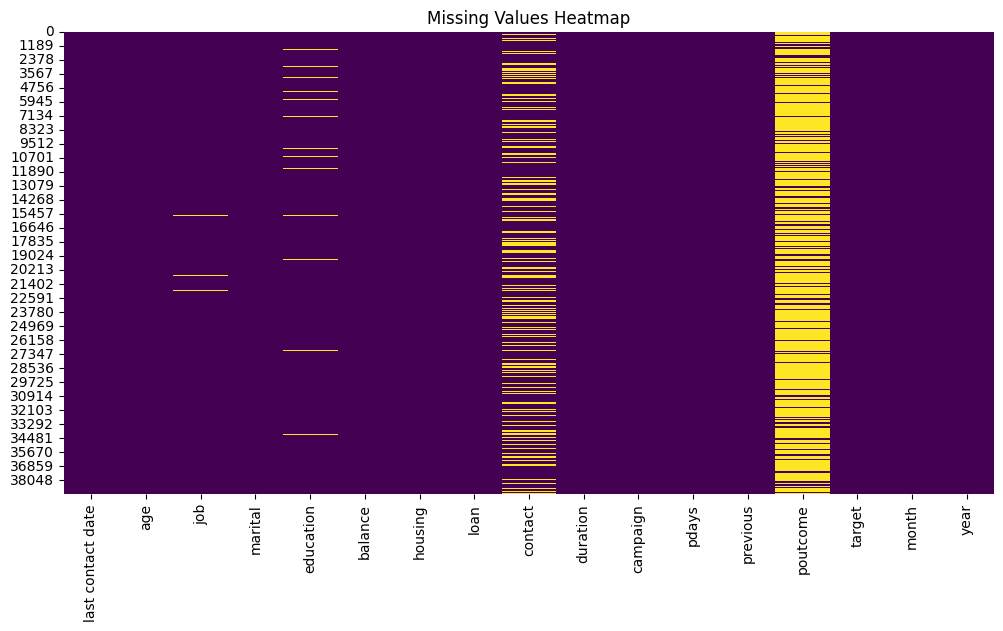

In [32]:
print("\nNull value count per column:")
print(train.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [33]:
train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
month                    0
year                     0
dtype: int64

In [34]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
month                 0.000000
year                  0.000000
dtype: float64


In [35]:
data = train

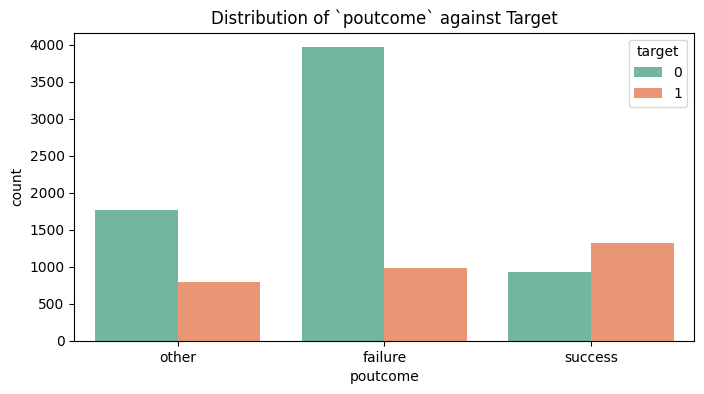

In [36]:
# Visualize `poutcome` against the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='poutcome', hue='target', data=data, palette='Set2')
plt.title("Distribution of `poutcome` against Target")
plt.show()


In [37]:
# Convert 'poutcome' to dummy variables
poutcome_dummies = pd.get_dummies(data['poutcome'], drop_first=True)
# Append the target variable to check correlation
poutcome_dummies['target'] = data['target'].replace({'yes': 1, 'no': 0})
# Check correlation
print("Correlation Matrix of poutcome categories with Target:")
print(poutcome_dummies.corr()['target'].sort_values(ascending=False))


Correlation Matrix of poutcome categories with Target:
target     1.000000
success    0.303748
other      0.120323
Name: target, dtype: float64


In [38]:
from sklearn.feature_selection import chi2, f_classif
# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nNull value count per column:")
print(data.isnull().sum())

# Convert datetime columns to numeric (year, month, day) if applicable
for col in data.columns:
    if np.issubdtype(data[col].dtype, np.datetime64):
        data[col + "_year"] = data[col].dt.year
        test[col + "_year"] = test[col].dt.year
        data[col + "_month"] = data[col].dt.month
        test[col + "_month"] = test[col].dt.month
        data[col + "_day"] = data[col].dt.day
        test[col + "_day"] = test[col].dt.day
        data.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)

# Handling categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col].astype(str))

test_categorical_cols = test.select_dtypes(include=['object']).columns
# test_encoded = test.copy()
for col in test_categorical_cols:
    test[col] = LabelEncoder().fit_transform(test[col].astype(str))

    
# Separate features and target variable
X = data_encoded.drop("target", axis=1, errors='ignore')  # Adjust column name if needed
y = data_encoded["target"] if "target" in data_encoded.columns else None


First few rows of the dataset:
  last contact date  age           job  marital  education  balance  housing  \
0        2009-04-17   26   blue-collar  married  secondary      647        1   
1        2009-10-11   52    technician  married  secondary      553        1   
2        2010-11-20   44   blue-collar  married  secondary     1397        0   
3        2009-09-01   33        admin.  married  secondary      394        1   
4        2008-01-29   31  entrepreneur   single   tertiary      137        0   

   loan    contact  duration  campaign  pdays  previous poutcome  target  \
0     0   cellular       357         2    331         1    other       0   
1     0  telephone       160         1     -1         0      NaN       0   
2     0   cellular       326         1     -1         0      NaN       0   
3     0  telephone       104         3     -1         0      NaN       0   
4     0   cellular       445         2     -1         0      NaN       0   

   month  year  
0      4  2009

### Handling Missing Values 


In [39]:
# Impute missing values in X with the mean value
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

## **5. Feature Engineering**


In [40]:
# ----------------- Feature Selection Using Chi-Square Test -----------------
print("\nTop features using Chi-Square test:")

# Handling missing values in X (necessary before scaling)
# X = X.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'object' else col)

# Use MinMaxScaler to ensure values are non-negative for Chi-Square test
X_scaled = MinMaxScaler().fit_transform(X)
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)
chi2_scores = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_selector.scores_})
# print(chi2_scores.sort_values("Chi2 Score", ascending=False))
# Define a threshold for importance (mean score in this case)
chi2_threshold = chi2_scores["Chi2 Score"].mean()
important_features_chi2 = chi2_scores[chi2_scores["Chi2 Score"] > chi2_threshold]["Feature"].tolist()
non_important_features_chi2 = chi2_scores[chi2_scores["Chi2 Score"] <= chi2_threshold]["Feature"].tolist()
print('important_features',important_features_chi2)
print(non_important_features_chi2)


Top features using Chi-Square test:
important_features ['balance', 'duration', 'campaign', 'pdays', 'previous']
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'month', 'year', 'last contact date_year', 'last contact date_month', 'last contact date_day']


In [41]:
# ----------------- Feature Selection Using ANOVA F-Test -----------------
print("\nTop features using ANOVA F-test:")
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = pd.DataFrame({"Feature": X.columns, "ANOVA F Score": anova_selector.scores_})
# print(anova_scores.sort_values("ANOVA F Score", ascending=False))
# Define a threshold for importance
anova_threshold = anova_scores["ANOVA F Score"].mean()
important_features_anova = anova_scores[anova_scores["ANOVA F Score"] > anova_threshold]["Feature"].tolist()
non_important_features_anova = anova_scores[anova_scores["ANOVA F Score"] <= anova_threshold]["Feature"].tolist()
print('important_features',important_features_anova)
print(non_important_features_anova)


Top features using ANOVA F-test:
important_features ['balance', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'year', 'last contact date_year', 'last contact date_month', 'last contact date_day']


In [42]:
# ----------------- Feature Selection Using Mutual Information -----------------
print("\nTop features using Mutual Information test:")
mutual_info_selector = SelectKBest(mutual_info_classif, k='all')
mutual_info_selector.fit(X, y)
mutual_info_scores = pd.DataFrame({"Feature": X.columns, "Mutual Info Score": mutual_info_selector.scores_}).sort_values(by="Mutual Info Score", ascending=False)
print(mutual_info_scores)
# Define a threshold for importance
mutual_info_threshold = mutual_info_scores["Mutual Info Score"].mean()
important_features_mutual_info = mutual_info_scores[mutual_info_scores["Mutual Info Score"] > mutual_info_threshold]["Feature"].tolist()
non_important_features_mutual_info = mutual_info_scores[mutual_info_scores["Mutual Info Score"] <= mutual_info_threshold]["Feature"].tolist()
print('important_features',important_features_mutual_info)
print(non_important_features_mutual_info)


Top features using Mutual Information test:
                    Feature  Mutual Info Score
8                  duration           0.093021
16  last contact date_month           0.053624
13                    month           0.050241
12                 poutcome           0.049919
10                    pdays           0.047426
4                   balance           0.045881
11                 previous           0.041120
7                   contact           0.024293
1                       job           0.023628
0                       age           0.023223
9                  campaign           0.019856
5                   housing           0.013918
2                   marital           0.010046
17    last contact date_day           0.007716
15   last contact date_year           0.004896
3                 education           0.003103
14                     year           0.002875
6                      loan           0.000000
important_features ['duration', 'last contact date_month', 'mo

In [43]:
# ----------------- Feature Importance Using Random Forest -----------------
print("\nTop features using RandomForest Feature Importance:")
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = pd.DataFrame({"Feature": X.columns, "Importance Score": model.feature_importances_})
# print(importances.sort_values("Importance Score", ascending=False))
# Define a threshold for importance
rf_threshold = importances["Importance Score"].mean()
important_features_rf = importances[importances["Importance Score"] > rf_threshold]["Feature"].tolist()
non_important_features_rf = importances[importances["Importance Score"] <= rf_threshold]["Feature"].tolist()
print('important_features',important_features_rf)
print(non_important_features_rf)


Top features using RandomForest Feature Importance:
important_features ['age', 'balance', 'duration', 'pdays', 'previous', 'last contact date_day']
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign', 'poutcome', 'month', 'year', 'last contact date_year', 'last contact date_month']


In [44]:
# ----------------- Feature Importance Using PCA -----------------
print("\nTop features using PCA:")
pca = PCA(n_components=10)
pca.fit(X)
pca_importance = pd.DataFrame({"Feature": X.columns, "PCA Score": pca.components_[0]})
# print(pca_importance.sort_values("PCA Score", ascending=False))
# Define a threshold for importance
pca_threshold = np.mean(np.abs(pca_importance["PCA Score"]))
important_features_pca = pca_importance[np.abs(pca_importance["PCA Score"]) > pca_threshold]["Feature"].tolist()
non_important_features_pca = pca_importance[np.abs(pca_importance["PCA Score"]) <= pca_threshold]["Feature"].tolist()
print('important_features',important_features_pca)
print(non_important_features_pca)


Top features using PCA:
important_features ['balance']
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'month', 'year', 'last contact date_year', 'last contact date_month', 'last contact date_day']


In [45]:
# Combine all important and non-important features
all_important_features = set(
    important_features_chi2 +
    important_features_anova +
    important_features_mutual_info +
    important_features_rf +
    important_features_pca
)

all_non_important_features = set(
    non_important_features_chi2 +
    non_important_features_anova +
    non_important_features_mutual_info +
    non_important_features_rf +
    non_important_features_pca
)
# Convert sets to lists
important_features_final = list(all_important_features)
non_important_features_final = list(all_non_important_features)

# Output the lists
print("\nImportant Features:")
print(important_features_final)

print("\nNon-Important Features:")
print(non_important_features_final)



Important Features:
['duration', 'last contact date_month', 'last contact date_day', 'age', 'month', 'poutcome', 'pdays', 'balance', 'campaign', 'previous']

Non-Important Features:
['job', 'last contact date_month', 'contact', 'year', 'age', 'marital', 'month', 'last contact date_day', 'duration', 'education', 'pdays', 'campaign', 'housing', 'last contact date_year', 'loan', 'poutcome', 'previous']


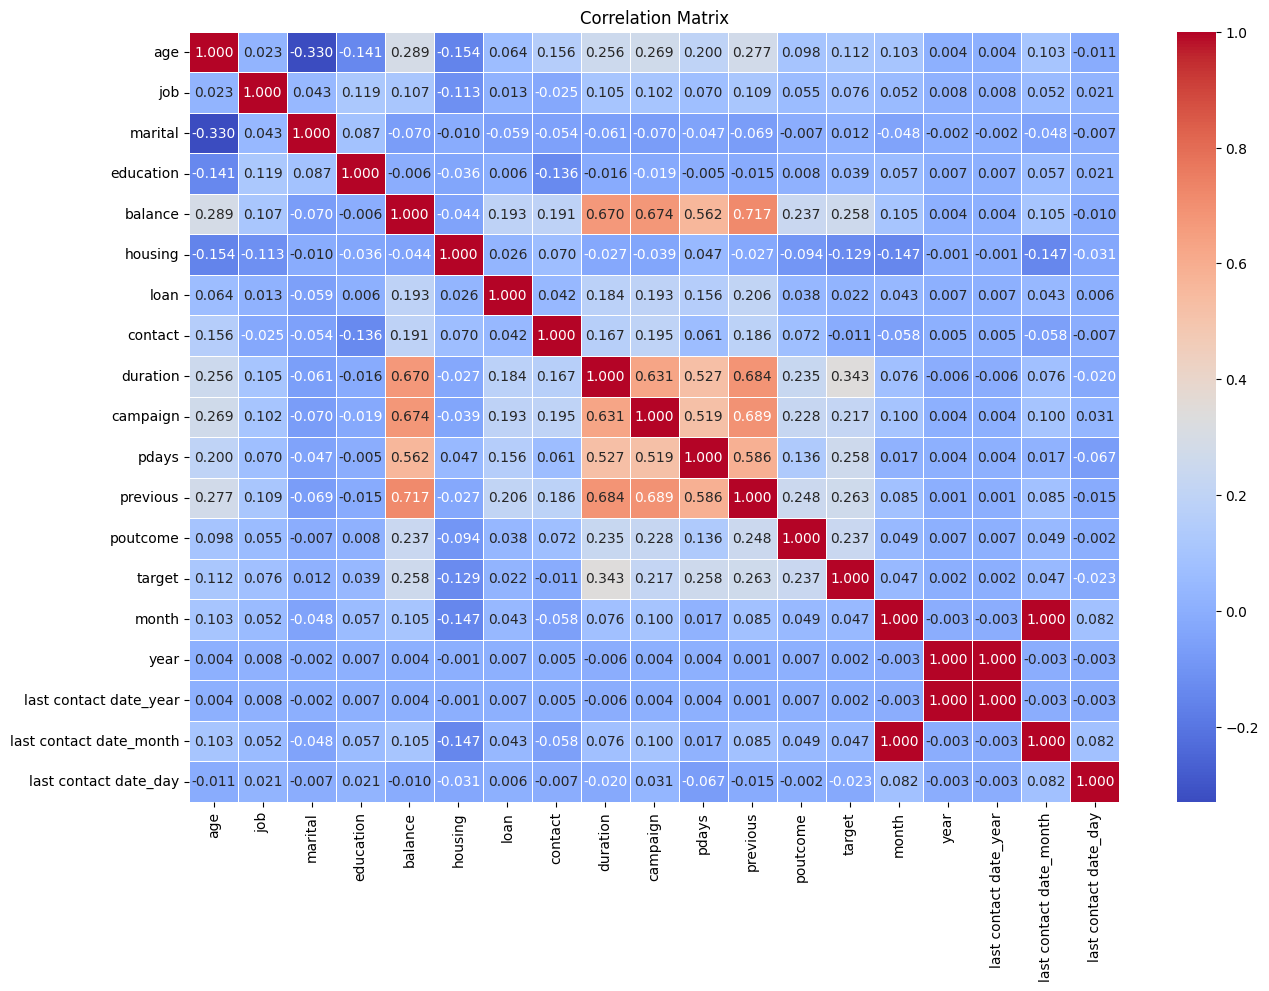


Correlation of features with the target variable:
target                     1.000000
duration                   0.343325
previous                   0.263123
pdays                      0.258120
balance                    0.257863
poutcome                   0.236922
campaign                   0.217205
age                        0.111939
job                        0.076101
month                      0.046564
last contact date_month    0.046564
education                  0.039074
loan                       0.021935
marital                    0.011970
year                       0.001874
last contact date_year     0.001874
contact                   -0.010515
last contact date_day     -0.022695
housing                   -0.129245
Name: target, dtype: float64


In [46]:
# Check the correlation of features with the target variable
plt.figure(figsize=(15, 10))
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.3f')
plt.title("Correlation Matrix")
plt.show()

# Display the most correlated features
print("\nCorrelation of features with the target variable:")
if y is not None:
    print(correlation["target"].sort_values(ascending=False))

In [47]:
if 'month' in important_features_final:
    important_features_final.remove('month') 

X = X[important_features_final]
test = test[important_features_final]
print(X.shape)
X.head()

(39211, 9)


,duration,last contact date_month,last contact date_day,age,poutcome,pdays,balance,campaign,previous
0,357.0,4.0,17.0,26.0,2.0,331.0,647.0,2.0,1.0
1,160.0,10.0,11.0,52.0,1.0,-1.0,553.0,1.0,0.0
2,326.0,11.0,20.0,44.0,1.0,-1.0,1397.0,1.0,0.0
3,104.0,9.0,1.0,33.0,1.0,-1.0,394.0,3.0,0.0
4,445.0,1.0,29.0,31.0,1.0,-1.0,137.0,2.0,0.0


In [48]:
# Define a Winsorization function
def winsorize_series(series, upper_quantile=0.95, lower_quantile=0.05):
    upper_lim = series.quantile(upper_quantile)
    lower_lim = series.quantile(lower_quantile)
    series = series.clip(lower=lower_lim, upper=upper_lim)
    return series

# X['previous'] = winsorize_series(X['previous'])
# X['campaign'] = winsorize_series(X['campaign'])

# Optional: Apply to all numeric columns if needed
numeric_cols = X.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    X[col] = winsorize_series(X[col])

# Check the changes
print(X.shape)
X.head()


(39211, 9)


,duration,last contact date_month,last contact date_day,age,poutcome,pdays,balance,campaign,previous
0,357.0,4.0,17.0,26.0,2.0,331.0,647.0,2.0,1.0
1,160.0,10.0,11.0,52.0,1.0,-1.0,553.0,1.0,0.0
2,326.0,11.0,20.0,44.0,1.0,-1.0,1397.0,1.0,0.0
3,104.0,9.0,3.0,33.0,1.0,-1.0,394.0,3.0,0.0
4,445.0,2.0,29.0,31.0,1.0,-1.0,137.0,2.0,0.0


In [49]:
std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(X), index=X.index, columns=X.columns)
test = pd.DataFrame(std_scaler.transform(test), index=test.index, columns=test.columns)

In [50]:
X.head()

,duration,last contact date_month,last contact date_day,age,poutcome,pdays,balance,campaign,previous
0,-0.024674,-0.902849,0.149632,-1.441664,1.462972,2.200907,-0.339586,-0.362423,-0.259859
1,-0.439446,1.508513,-0.584336,0.964144,-0.083327,-0.505440,-0.349447,-0.526830,-0.299625
2,-0.089942,1.910407,0.516616,0.223895,-0.083327,-0.505440,-0.260906,-0.526830,-0.299625
3,-0.557350,1.106620,-1.562960,-0.793946,-0.083327,-0.505440,-0.366127,-0.198017,-0.299625
4,0.160605,-1.706636,1.617567,-0.979009,-0.083327,-0.505440,-0.393088,-0.362423,-0.299625


## **6. Model**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

### Logistic Regression

In [52]:
lr = LogisticRegression(solver='liblinear',class_weight='balanced')
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']  
}

lr_grid = GridSearchCV(lr, lr_params, scoring='f1', cv=5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [53]:
lr_grid = GridSearchCV(lr, lr_params, scoring='f1_macro', cv=5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [54]:
best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(X_test)

In [55]:
print("\nBest Logistic Regression Parameters:", lr_grid.best_params_)
print("Accuracy:", (accuracy_score(y_test, y_pred_lr))*100)
print(classification_report(y_test, y_pred_lr))


Best Logistic Regression Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 83.51396149432615
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6713
           1       0.45      0.67      0.54      1130

    accuracy                           0.84      7843
   macro avg       0.70      0.77      0.72      7843
weighted avg       0.87      0.84      0.85      7843



In [56]:
X2_train = X
y2_train = y

lr2 = LogisticRegression(solver='liblinear', C=0.001, penalty='l2', class_weight='balanced')
lr2.fit(X2_train,y2_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

In [57]:
y_pred_test = pd.DataFrame(lr2.predict(test))

### Random Forest

In [58]:
# rf = RandomForestClassifier(random_state=2,class_weight='balanced')
# rf_params = {
#     'n_estimators': [100, 200, 300],  
#     'max_depth': [5, 10, 20, None],  
#     'min_samples_split': [2, 5, 10]  
# }

In [59]:
# rf_grid = GridSearchCV(rf, rf_params, scoring='f1_macro', cv=5)
# rf_grid.fit(X_train, y_train)

In [60]:
# best_rf = rf_grid.best_estimator_
# y_pred_rf = best_rf.predict(X_test)

In [61]:
rf = RandomForestClassifier(random_state=2,
                            max_depth=15,
                            max_features=0.7,
                            min_samples_leaf=4,
                            min_samples_split=8,
                            n_estimators=100,
                           bootstrap=True)
rf.fit(X2_train,y2_train)


RandomForestClassifier(max_depth=15, max_features=0.7, min_samples_leaf=4,
                       min_samples_split=8, random_state=2)

In [62]:
y_pred_rf = rf.predict(X_test)

In [63]:
# print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6713
           1       0.91      0.76      0.83      1130

    accuracy                           0.95      7843
   macro avg       0.94      0.88      0.90      7843
weighted avg       0.95      0.95      0.95      7843

0.8302068302068302


In [64]:
# print("Accuracy:", (accuracy_score(y_test, forest_predictions))*100)
# print(classification_report(y_test, forest_predictions))

In [65]:
X2_train = X
y2_train = y
forest2 = RandomForestClassifier(random_state=2,
                            max_depth=15,
                            max_features='sqrt',
                            min_samples_leaf=5,
                            min_samples_split=10,
                            n_estimators=75)
forest2.fit(X2_train,y2_train)
y_pred_test_2 = pd.Series(forest2.predict(test))

### SVM

In [66]:
# svm = SVC(class_weight='balanced')
# svm_params = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],  
#     'gamma': ['scale', 'auto']  
# }

In [67]:
# svm_grid = GridSearchCV(svm, svm_params, scoring='f1', cv=5)
# svm_grid.fit(X_train, y_train)

In [68]:
# best_svm = svm_grid.best_estimator_
# y_pred_svm = best_svm.predict(X_test)
# print("\nBest SVM Parameters:", svm_grid.best_params_)
# print(classification_report(y_test, y_pred_svm))

In [69]:
X2_train = X
y2_train = y
best_svm_full = SVC(C=0.1, gamma='scale', kernel='rbf', class_weight='balanced')  
best_svm_full.fit(X2_train, y2_train) 

# Predict on the test data (if test data is available)
y_pred_test_3 =  pd.Series(best_svm_full.predict(test))

### XGBoost

In [70]:
# negative_class_count = (y_train == 0).sum()  
# positive_class_count = (y_train == 1).sum()  

# scale_pos_weight = negative_class_count / positive_class_count
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# xgb_params = {
#     'n_estimators': [200,300],
#     'max_depth': [7,9],
#     'learning_rate': [0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0.1,0.2],
#     'min_child_weight': [3, 5,10],
#     'scale_pos_weight': [1, scale_pos_weight],  
#     'alpha': [0.1,0.5],  
#     'lambda': [1, 2]  
# }

In [71]:
# xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='f1_macro', cv=5, verbose=1)
# xgb_grid.fit(X_train, y_train)


In [72]:
# best_xgb = xgb_grid.best_estimator_
# y_pred_xgb = best_xgb.predict(X_test)

# print("\nBest XGBoost Parameters:", xgb_grid.best_params_)
# print(classification_report(y_test, y_pred_xgb))
# print(f1_score(y_test, y_pred_xgb))


Best XGBoost Parameters: {'alpha': 0.5, 'colsample_bytree': 0.6, 'gamma': 0.2, 'lambda': 1, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'scale_pos_weight': 5.678305301256121, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6713
           1       0.50      0.82      0.62      1130

    accuracy                           0.86      7843
   macro avg       0.73      0.84      0.77      7843
weighted avg       0.90      0.86      0.87      7843

0.6222816995650718

In [73]:

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    alpha=0.5,
    colsample_bytree=0.6,
    gamma=0.2,
    reg_lambda=1,  
    learning_rate=0.05,
    max_depth=9,
    min_child_weight=3,
    n_estimators=200,
    scale_pos_weight=5.678305301256121,
    subsample=0.8,
    random_state=42  
)

xgb_model.fit(X_train, y_train)

# Predict on the test set (assuming you have X_test prepared)
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

print(f1_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6713
           1       0.50      0.82      0.62      1130

    accuracy                           0.85      7843
   macro avg       0.73      0.84      0.76      7843
weighted avg       0.90      0.85      0.87      7843

0.6188729576525508


In [74]:
X2_train = X  
y2_train = y 

xgb_model = xgb.XGBClassifier(
objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    alpha=0.5,
    colsample_bytree=0.6,
    gamma=0.2,
    reg_lambda=1,  
    learning_rate=0.05,
    max_depth=9,
    min_child_weight=3,
    n_estimators=200,
    scale_pos_weight=5.678305301256121,
    subsample=0.8,
    random_state=42  
)

xgb_model.fit(X2_train, y2_train)

y_pred_test_4 =  pd.Series(xgb_model.predict(test))

In [75]:
gain_df = pd.DataFrame({'Gain': forest2.feature_importances_}, index=X_train.columns).sort_values('Gain', ascending = False)
gain_df

,Gain
duration,0.357258
poutcome,0.123759
balance,0.091093
age,0.084253
pdays,0.083076
last contact date_day,0.082750
last contact date_month,0.077075
previous,0.068668
campaign,0.032067


## **7. Submission**

In [76]:
samp = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
samp.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


In [77]:
samp.columns

Index(['id', 'target'], dtype='object')

In [78]:
index = samp['id']
ans = pd.concat([index, y_pred_test_4],axis=1 )
ans.rename(inplace=True, columns={0:'target'})
# print(ans)
ans['target'] = ans['target'].replace({0: 'no', 1: 'yes'})

ans.to_csv('submission.csv', index=False)
